In [16]:
# from https://umap-learn.readthedocs.io/en/latest/basic_usage.html

import umap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
penguins = penguins.dropna()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

In [10]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

In [11]:
#  we just want the measurement columns, and since the measurements 
#  are on entirely different scales it will be helpful to convert each feature 
#  into z-scores (number of standard deviations from the mean) for comparability.

scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [32]:
reducer = umap.UMAP(n_neighbors=150, min_dist=5)

In [33]:
embedding = reducer.fit_transform(scaled_penguin_data)

/Users/m/Documents/__PROJECTS/2021/latent_space_cartography/code/pyenv/lib/python3.7/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/Users/m/Documents/__PROJECTS/2021/latent_space_cartography/code/pyenv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


ValueError: min_dist must be less than or equal to spread

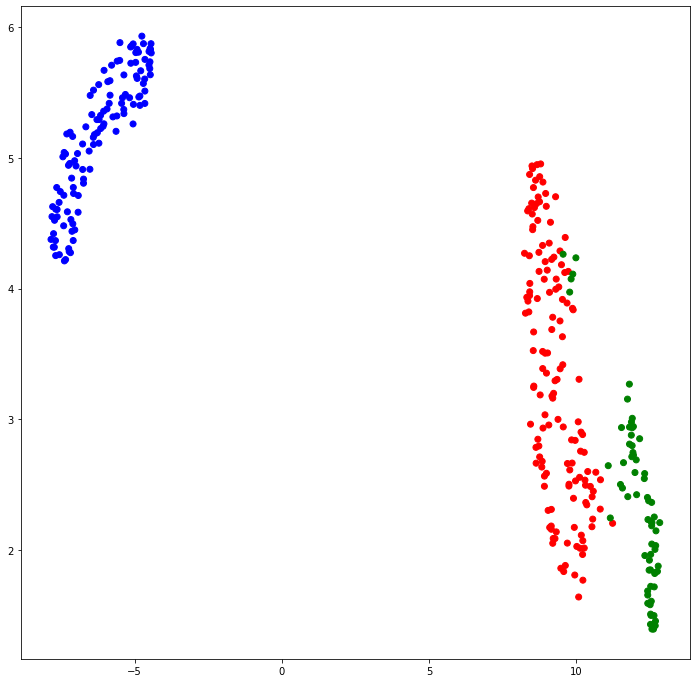

In [34]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

palette = ['red', 'green', 'blue']
penguin_indices = penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})
colors = [palette[i] for i in penguin_indices]
ax.scatter(embedding[:, 0] ,embedding[:, 1], c=colors)
